# 1. The Dataset (20 points)

Our dataset is a table of songs, each with a name, an artist, and a genre.  For each song, we also know how frequently certain words occur in that song.  More precisely, we have a list of approximately 5000 words.  For each of these words, for each song, each item in the table describes the proportion of the song's lyrics that are the particular word.

For example, the lyrics of "In Your Eyes" is 168 words long. The word "like" appears twice:  $\frac{2}{168} \approx 0.0119$ of the words in the song. Similarly, the word "love" appears 10 times: $\frac{10}{168} \approx 0.0595$ of the words. 

Our dataset doesn't contain all information about a song.  For example, it doesn't include the total number of words in each song, or information about the order of words in the song, let alone the melody, instruments, or rhythm. Nonetheless, you may find that word counts alone are sufficient to build an accurate genre classifier.

Run the cell below to read the `lyrics` table. **It may take up to a minute to load.**

### Note1: Max grade of the project is 100. The bonus (in one project question) is not counted if your grade has reached 100). 
 
### Note2: if your partner is not cooperative, and you all cannot work it out, please consider to split the group as early as you can. 

### Note3: A group of one/two person(s) has the same evaluation as a group of three. Please don't expect to answer fewer questions because of that reason.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("lyrics_clean.csv")
df.head()

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,Slicker Than Your Average,Craig David,Hip-hop,0.049536,0.017028,0.035604,0.020124,0.007740,0.006192,0.058824,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,Right There,MF Grimm,Hip-hop,0.037825,0.054374,0.023641,0.049645,0.009456,0.016548,0.018913,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,Talkin' All That,Cashis,Hip-hop,0.056738,0.049645,0.051418,0.010638,0.026596,0.033688,0.007092,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,It Only Hurts Me When I Cry,Raul Malo,Country,0.096491,0.074561,0.030702,0.017544,0.026316,0.017544,0.021930,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,Is It Too Late Now,Lester Flatt & Earl Scruggs,Country,0.043902,0.000000,0.073171,0.019512,0.000000,0.014634,0.034146,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


**Question 1.1**: Print the number of rows and columns in the dataset 

In [3]:
row_count = df.shape[0]
col_count = df.shape[1]

print('Number of Columns:', col_count)
print('Number of Rows', row_count)

Number of Columns: 4979
Number of Rows 1721


**Question 1.2**: Find the proportion of the word `like` in the song `In Your Eyes`

In [4]:
df.loc[df['Title']=='In Your Eyes', 'like'].values[0]

0.01190476

**Question 1.3:** Set `expected_row_sum` to the number that you expect will result from summing all proportions in each row, excluding the first three columns. 

In [5]:
# Set row_sum to a number that's the (approximate) sum of each row of word proportions.

expected_row_sum = 1.0
print('Expected Total proportion sum is', expected_row_sum)

Expected Total proportion sum is 1.0


Verify your answer by doing sum along the columns for each row

In [6]:
expected_row_df = df.drop(['Title', 'Artist', 'Genre'], axis=1)
df['Sum'] = expected_row_df.sum(axis=1)
row_sum = df['Sum']
row_sum

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1716    1.0
1717    1.0
1718    1.0
1719    1.0
1720    1.0
Name: Sum, Length: 1721, dtype: float64

In [7]:
df

,Title,Artist,Genre,i,the,you,to,and,a,me,...,motivo,bake,insist,wel,santo,pe,gee,colleg,kad,Sum
0,Slicker Than Your Average,Craig David,Hip-hop,0.049536,0.017028,0.035604,0.020124,0.007740,0.006192,0.058824,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
1,Right There,MF Grimm,Hip-hop,0.037825,0.054374,0.023641,0.049645,0.009456,0.016548,0.018913,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
2,Talkin' All That,Cashis,Hip-hop,0.056738,0.049645,0.051418,0.010638,0.026596,0.033688,0.007092,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
3,It Only Hurts Me When I Cry,Raul Malo,Country,0.096491,0.074561,0.030702,0.017544,0.026316,0.017544,0.021930,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
4,Is It Too Late Now,Lester Flatt & Earl Scruggs,Country,0.043902,0.000000,0.073171,0.019512,0.000000,0.014634,0.034146,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Desde el otro lado (con Nach),Arma Blanca,Hip-hop,0.000000,0.000000,0.000000,0.000000,0.000000,0.021144,0.023632,...,0.002488,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
1717,Dixie Fried,Carl Perkins,Country,0.027027,0.042471,0.003861,0.015444,0.038610,0.019305,0.000000,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
1718,Virginia Bluebell,Miranda Lambert,Country,0.000000,0.080214,0.069519,0.016043,0.016043,0.042781,0.000000,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
1719,Lonelier Than This,Steve Earle,Country,0.067308,0.014423,0.004808,0.004808,0.028846,0.009615,0.000000,...,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0


## Word Stemming
The columns other than Title, Artist, and Genre in the `lyrics` table are all words that appear in some of the songs in our dataset.  Some of those names have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each song.  

Stemming makes it a little tricky to search for the words you want to use, so we have provided another dataframe that will let you see examples of unstemmed versions of each stemmed word.  Run the code below to load it.

**Question 1.4**: Read the vocabulary from the given file `mxm_reverse_mapping_safe.csv` and store it into a variale `vocab_mapping`

In [8]:
vocab_mapping = pd.read_csv('mxm_reverse_mapping_safe.csv')
vocab_mapping

,Stem,Word
0,día,día
1,pido,pido
2,hatr,hatred
3,pide,pide
4,yellow,yellow
...,...,...
4971,yell,yell
4972,at,at
4973,confess,confess
4974,sincer,sincere


**Question 1.5**: Compare if the number of stemmed words in the vocabulary is the same with one in the song lyrics dataset.

In [9]:
print('The number of Stem words from mxm_reverse_mapping_safe.csv is', vocab_mapping.shape[0])
print('The number of Stemmed words from the song lyric dataset is', expected_row_df.shape[1])

The number of Stem words from mxm_reverse_mapping_safe.csv is 4976
The number of Stemmed words from the song lyric dataset is 4976


**Question 1.6:** Assign `unchanged` to the **percentage** of words in `vocab_table` that are the same as their stemmed form. 

In [10]:
vocab_table= vocab_mapping
shared_stem_word = vocab_table.loc[vocab_table['Stem']==vocab_table['Word']]
unchanged = (shared_stem_word.shape[0]/vocab_mapping.shape[0])
print(unchanged*100, '%')

72.16639871382637 %


**Question 1.7:** Assign `stemmed_message` to the stemmed version of the word "message".

In [11]:
# Set stemmed_message to the stemmed version of "message" (which
# should be a string).  
stemmed_message_df = vocab_table.loc[vocab_table['Word'] == 'message']
stemmed_message = stemmed_message_df['Stem']
stemmed_message.values[0]

'messag'

In [12]:
stemmed_message = vocab_table.loc[vocab_table['Word'] == 'message','Stem']
stemmed_message.values[0]

'messag'

**Question 1.8:** Assign `unstemmed_singl` to the word in `vocab_table` that has "singl" as its stemmed form. (*Note that multiple English words may stem to "singl", but only one example appears in `vocab_table`.*)

In [13]:
# Set unstemmed_singl to the unstemmed version of "single" (which
# should be a string).
unstemmed_singl = (vocab_table.loc[vocab_table['Stem']== 'singl', 'Word'])
unstemmed_singl.values[0]

'single'

**Question 1.9:** What word in `vocab_table` was shortened the most by this stemming process? Assign `most_shortened` to the word. *hint: function len(str) will return the length of the input string `str`. You will do a loop over rows of the vocabulary to compute the length of each word.*

In [14]:
def word_length():
    stem_shortened = []
    fulls = []
    stems = []
    for index, row in vocab_table.iterrows():
        full_length = len(row['Word'])
        stem_length = len(row['Stem'])
        fulls.append(full_length)
        stems.append(stem_length)
    
    data = {
        'full_word_length': fulls,
        'stem_word_length': stems
    }
    diff_df = pd.DataFrame(data)
    diff_df['Difference'] = diff_df['full_word_length'] - diff_df['stem_word_length']
    
    vocab_table['Difference'] = diff_df['Difference']
    most_shortened_length = vocab_table['Difference'].max()    
    most_shortened = vocab_table.loc[vocab_table['Difference'] == most_shortened_length]

    return most_shortened

In [15]:
word_length()

,Stem,Word,Difference
983,intern,international,7


## Splitting the dataset
We're going to use our `lyrics` dataset for two purposes.  First, we want to *train* various song genre classifiers.  Second, we want to *test* the performance of our final classifier. Hence, we need two different datasets: *training*, and *test*.

The purpose of a classifier is to generalize to unseen data that is similar to the training data. Therefore, we must ensure that there are no songs that appear in two different sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the top for training, and the last for test. 

**Question 1.10**: Split the data with the ratio `80%` for training and `20%` for testing. 

In [16]:
lyrics = pd.read_csv("lyrics_clean.csv")
row_num = lyrics.shape[0]
training_size = 0.8*row_num
testing_size = 0.2*row_num

training_df = lyrics.loc[0:(training_size-1)]
training_df = training_df.copy()
testing_df = lyrics.loc[training_size:]
testing_df = testing_df.copy()

In [17]:
training_df

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,Slicker Than Your Average,Craig David,Hip-hop,0.049536,0.017028,0.035604,0.020124,0.007740,0.006192,0.058824,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,Right There,MF Grimm,Hip-hop,0.037825,0.054374,0.023641,0.049645,0.009456,0.016548,0.018913,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,Talkin' All That,Cashis,Hip-hop,0.056738,0.049645,0.051418,0.010638,0.026596,0.033688,0.007092,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,It Only Hurts Me When I Cry,Raul Malo,Country,0.096491,0.074561,0.030702,0.017544,0.026316,0.017544,0.021930,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,Is It Too Late Now,Lester Flatt & Earl Scruggs,Country,0.043902,0.000000,0.073171,0.019512,0.000000,0.014634,0.034146,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,Enter Galactic (Love Connection Part I),Kid Cudi,Hip-hop,0.026810,0.018767,0.064343,0.029491,0.029491,0.026810,0.024129,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1372,A Modern Day City Symphony,Looptroop,Hip-hop,0.030060,0.060120,0.020040,0.024048,0.020040,0.024048,0.016032,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1373,Poor Orphan Child,Ralph Stanley,Country,0.013793,0.065517,0.000000,0.020690,0.048276,0.003448,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1374,Some Guys Have All The Love (Album Version),Little Texas,Country,0.066372,0.066372,0.026549,0.008850,0.026549,0.017699,0.013274,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [18]:
testing_df

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
1377,Hush,Billy Joe Royal,Country,0.095710,0.042904,0.003300,0.009901,0.019802,0.006601,0.003300,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1378,She Got Me Twisted,Seeed,Hip-hop,0.039877,0.018405,0.000000,0.030675,0.027607,0.021472,0.036810,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1379,Dear Life,Anthony Hamilton,Hip-hop,0.054795,0.018265,0.059361,0.004566,0.004566,0.022831,0.018265,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1380,Le missile est lancé,Keny Arkana,Hip-hop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1381,You Always Win,Raul Malo,Country,0.040650,0.024390,0.121951,0.032520,0.024390,0.000000,0.016260,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Desde el otro lado (con Nach),Arma Blanca,Hip-hop,0.000000,0.000000,0.000000,0.000000,0.000000,0.021144,0.023632,...,0.0,0.002488,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1717,Dixie Fried,Carl Perkins,Country,0.027027,0.042471,0.003861,0.015444,0.038610,0.019305,0.000000,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1718,Virginia Bluebell,Miranda Lambert,Country,0.000000,0.080214,0.069519,0.016043,0.016043,0.042781,0.000000,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1719,Lonelier Than This,Steve Earle,Country,0.067308,0.014423,0.004808,0.004808,0.028846,0.009615,0.000000,...,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0


**Question 1.11**: Draw a horizontal bar chart with two bars that show the proportions of Country songs in each of the training and testing datasets.

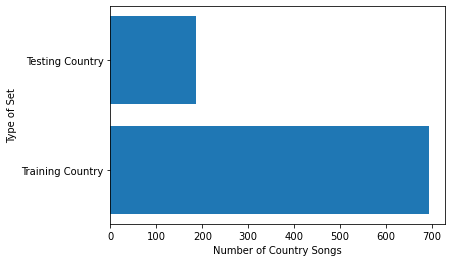

In [19]:
import matplotlib.pyplot as plt
training_country = training_df.loc[training_df['Genre'] == 'Country']
testing_country = testing_df.loc[testing_df['Genre'] == 'Country']
        
training_country_num = training_country.shape[0]        
testing_country_num = testing_country.shape[0]

y=['Training Country', 'Testing Country']

plt.barh(y, [training_country_num, testing_country_num])
plt.xlabel('Number of Country Songs')
plt.ylabel('Type of Set')
plt.show()

# 2. K-Nearest Neighbors (20 points)

K-Nearest Neighbors (k-NN) is a classification algorithm.  Given some *features* of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples.  

A feature we have about each song is *the proportion of times a particular word appears in the lyrics*, and the categories are two music genres: hip-hop and country.  The algorithm requires many previously seen examples for which both the features and categories are known: that's the `train_lyrics` table.

We're going to visualize the algorithm, instead of just describing it. To get started, let's pick colors for the genres.

In [20]:
# Just run this cell to define genre_color.

def genre_color(genre):
    """Assign a color to each genre."""
    if genre == 'Country':
        return 'gold'
    elif genre == 'Hip-hop':
        return 'blue'
    else:
        return 'green'

In [21]:
genre_color('Country')

'gold'

In [22]:
genre_color('Hip-hop')

'blue'

## Classifying a  song

In k-NN, we classify a song by finding the `k` songs in the *training set* that are most similar according to the features we choose. We call those songs with similar features the "neighbors".  The k-NN algorithm assigns the song to the most common category among its `k` neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each song.  The features we will use are the proportions of the words "like" and "love" in the lyrics.  Taking the song "In Your Eyes" (in the test set), 0.0119 of its words are "like" and 0.0595 are "love". This song appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *dissimilarity*, or *distance* between two songs is the straight-line distance between them when we plot their features in a scatter diagram. This distance is called the Euclidean ("yoo-KLID-ee-un") distance.  

For example, in the song *Insane in the Brain* (in the training set), 0.0203 of all the words in the song are "like" and 0 are "love".  Its distance from *In Your Eyes* on this 2-word feature set is $\sqrt{(0.0119 - 0.0203)^2 + (0.0595 - 0)^2} \approx 0.06$.  (If we included more or different features, the distance could be different.)

A third song, *Sangria Wine* (in the training set), is 0.0044 "like" and 0.0925 "love".



**Question 2.1**: Define a function that creates a plot to display a test song and some training songs in a two-dimensional space defined by two features. Utilize the function to visualize the songs *In Your Eyes*, *Sangria Wine*, and *Insane in the Brain*.

hint: the function has four arguments and it does not return anything but it plots the songs in 2D space:

* test_song: has string datatype, is the name of a song
* training_songs: has list datatype, is a list of songs
* x_feature: has string datatype, is the name of a feature.
* y_feature: has string datatype, is the name of another feature.

In [23]:
import matplotlib.pyplot as plt

def plot_with_two_features(test_song, training, x_feature, y_feature):
    """Plot a test song and training songs using two features."""
    test_song_data = testing_df.loc[testing_df['Title'] == test_song]
    training_song_data1 = training_df.loc[training_df['Title'] == training[0]]
    training_song_data2 = training_df.loc[training_df['Title'] == training[1]]
    plt.scatter(x=test_song_data[x_feature], y=test_song_data[y_feature], label=test_song)
    plt.scatter(x=training_song_data1[x_feature], y=training_song_data1[y_feature], label=training[0])
    plt.scatter(x=training_song_data2[x_feature], y=training_song_data2[y_feature], label=training[1])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()
    

**Question 2.2**: Utilize the `plot_with_two_features` function and plot the positions of the three songs *Sangria Wine*, *Lookin' for Love*, *Insane In The Brain* together with the song *In Your Eyes*. Which one is closer to *In Your Eyes* and what is its genre?

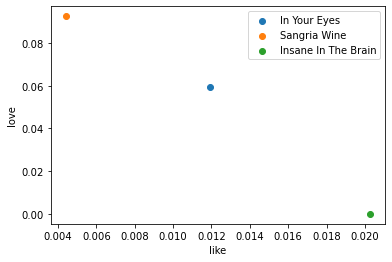

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
704,Sangria Wine,Jerry Jeff Walker,Country,0.088106,0.022026,0.008811,0.030837,0.030837,0.004405,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


In [24]:
# visualize the distances of the songs In Your Eyes, Sangria Wine, and Insane in the Brain.
training = ["Sangria Wine", "Insane In The Brain"]
test_song = "In Your Eyes"
plot_with_two_features(test_song, training, "like", "love")
training_df.loc[training_df['Title'] == training[0]]

Sangria Wine is closer to the In Your Eyes song than Insane In the Brain. Also Sangria Wine is a Country Song, as its dot is gold.

**Question 2.3.** Complete the function `distance_two_features` that computes the Euclidean distance between any two songs, using two features. Utilize the function `distance_two_features`  to show that *Lookin' for Love* is closer to *In Your Eyes* than *Insane In The Brain*. 

In [25]:
import math as m

def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two songs, represented as rows."""
    first_title = lyrics.loc[lyrics['Title']== title0]
    second_title = lyrics.loc[lyrics['Title']== title1]
    
    x1=first_title[x_feature]
    y1=first_title[y_feature]
    x2=second_title[x_feature]
    y2=second_title[y_feature]
    
    point1 = np.array((x1, y1))
    point2 = np.array((x2, y2))
     
    euc_distance = np.sqrt(np.sum((point1 - point2)**2))
    return euc_distance

In [26]:
d1=distance_two_features('In Your Eyes', "Lookin' for Love", "like", "love")
d2=distance_two_features('In Your Eyes', "Insane In The Brain", "like", "love")
print('Based off of the "like" and "love" features; The distance between "In Your Eyes" and "Lookin for Love" is', d1,
     'and the distance between "In Your Eyes" and "Insane In The Brain" is', d2, 'Therefore the song "Lookin for Love" is',
     'closer to "In Your Eyes" then "Insane In the Brain"')

Based off of the "like" and "love" features; The distance between "In Your Eyes" and "Lookin for Love" is 0.017854025951587398 and the distance between "In Your Eyes" and "Insane In The Brain" is 0.060108782340654685 Therefore the song "Lookin for Love" is closer to "In Your Eyes" then "Insane In the Brain"


The nearest neighbor to a song is the example in the training set that has the smallest distance from that song.

**Question 2.4.**  What are the names and genres of the 7 closest songs to "In Your Eyes" in  `train_lyrics`, by Euclidean distance for the 2 features "like" and "love"?  To answer this question, make a dataframe named `close_songs` containing those 7 songs with columns "Title", "Artist", "Genre", "like", and "love" from the `lyrics` dataframe, as well as a column called `distance` that contains the distance from "In Your Eyes" **sorted in ascending order**.

In [27]:
train_lyrics = training_df
distances =[]
for index, row in train_lyrics.iterrows():
    new_song_data = row[['like', 'love']]
    new_song = row['Title']
    distance = distance_two_features('In Your Eyes', new_song, 'like', 'love')
    distances.append(distance)
    
train_lyrics['Distance'] = distances
close_lyrics = train_lyrics.nsmallest(7, ['Distance'])
close_songs = close_lyrics.loc[:,['Title', 'Artist', 'Genre','like','love', 'Distance']]
close_songs.sort_values(by=['Distance'], inplace=True)
close_songs

,Title,Artist,Genre,like,love,Distance
828,If This Isn't Love,Jennifer Hudson,Hip-hop,0.008869,0.053215,0.007001
1108,Big Red Rocket Of Love,Reverend Horton Heat,Hip-hop,0.000000,0.057692,0.012045
1106,In the Middle of a Heartache,Wanda Jackson,Country,0.000000,0.063953,0.012702
160,The Hardest Part,Allison Moorer,Country,0.000000,0.064286,0.012822
1063,One Time,Justin Bieber,Hip-hop,0.000000,0.053030,0.013561
627,This Tornado Loves You,Neko Case,Country,0.000000,0.052846,0.013650
1201,Mama Knew Love,Anthony Hamilton,Hip-hop,0.020619,0.048969,0.013687


**Question 2.5 .** Find the most common value in the column `Genre` of the dataframe `close_songs`. In case of a tie, it can return any of the most common values.

In [28]:
country = close_songs.groupby(['Genre']).size().values[0]
hiphop = close_songs.groupby(['Genre']).size().values[1]
print('Country Count:', country)
print('Hip Hop Count:', hiphop)
print('Hip Hop songs are greater than the country songs')

Country Count: 3
Hip Hop Count: 4
Hip Hop songs are greater than the country songs


In [29]:
def common_value(given_df, genre1, genre2):
    countgenre1 = list(given_df['Genre']).count(genre1)
    countgenre2 = list(given_df['Genre']).count(genre2)
    if countgenre1 > countgenre2:
        return genre1
    elif countgenre2 == countgenre1:
        return genre1
    else:
        return genre2

In [30]:
my_genre = common_value(close_songs, 'Country', 'Hip-hop')
my_genre

'Hip-hop'

Congratulations -- you've classified your first song!

# 3. Features (20 points)

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two songs, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

#### Question 3.1
Write a function to compute the Euclidean distance between two **arrays** of features of *arbitrary* (but equal) length.  Use it to compute the distance between the first song in the training set and the first song in the test set, *using all of the features*.  (Remember that the title, artist, and genre of the songs are not features.)

**Hint:** The function has two arguments which are two arrays representing the two lists of features (list1_features is the list of features for data-point1 and list2_features is the list of features for data-point2: 

In [31]:
import numpy as np
def distance(list1_features, list2_features):
    """The Euclidean distance between two arrays of feature values."""
    euc_dist = np.sqrt(np.sum((list1_features - list2_features)**2))
    return euc_dist

In [32]:
first_title = train_lyrics.drop(columns=['Title','Artist','Genre']).iloc[0]
second_title = testing_df.drop(columns=['Title','Artist','Genre']).iloc[0]

distance(first_title, second_title)

0.22283862822148529

## Creating your own feature set

Unfortunately, using all of the features has some downsides.  One clear downside is *computational* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So we're going to select just 20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or more broadly *feature engineering*.

In [33]:
newdf = lyrics.drop(columns=lyrics.columns[((lyrics==0).mean()>0.7)],axis=1)
columns = newdf.columns

c = []
for col in columns:
    if len(col)<=3:
        c.append(col)

#### Question 3.2
Look through the list of features (the labels of the `lyrics` table after the first three).  Choose 20 common words that you think might let you distinguish between country and hip-hop songs. Make sure to choose words that are frequent enough that every song contains at least one of them. Don't just choose the 20 most frequent, though... you can do much better.

The first time you answer this question, spend some time looking through the features, but not more than 15 minutes.

In [34]:
#this was are first itteration of finding features by slicing out irrelevent data and sampling from the remaining data, 
#unfourtunatally, this good first concept did not end up working so we had to pick our features by analyzing the columns list
        
#no_small_words = newdf.drop(newdf[c], axis=1)

#remove_nonwords = no_small_words.drop(['Title', 'Artist', 'Genre'], axis=1)

#label_df = lyrics.filter(['Title', 'Artist', 'Genre'], axis=1)

#df_sample20=remove_nonwords.sample(n=20, axis=1).reset_index(drop=True)

#df_sample20[['Title','Artist','Genre']] = lyrics[['Title','Artist','Genre']]
#cols =list(df_sample20.columns)
#cols = [cols[-3]]+[cols[-2]]+[cols[-1]]+cols[:-3]
#df_sample20=df_sample20[cols]
#df_sample20

#df_sample20.columns

In [35]:
features = ["train", "cadillac", "southern", "leather", "rapper", "buck", "chicken", "harvest", "dope", "cop", "yall", "boat", "billion", "cowboy", "off",
"thought", "should", "hard", "pleas", "wrong"]

#### Question 3.3
In two sentences or less, describe how you selected your features. 

We eliminated words with a majority of 0 proportions for the genres, then eliminated non-genre defining words such as 'a', 'or', 'at', etc. that would have been irrelevent to the genre of the songs. Then from the remaining words we picked 20 that would apply specifically to the hip-hop and country genres.

#### Question 3.4
Use the `distance` function developed above to compute the distance from the first song in the test set to all the songs in the training set, **using your set of 20 features**.  Make a new dataframe called `genre_and_distances` with one row for each song in the training set and two columns:
* The `"Genre"` of the training song
* The `"Distance"` from the first song in the test set 

Ensure that `genre_and_distances` is **sorted in increasing order by distance to the first test song**.

In [36]:
#training20 = training_df[cols]
#testing20 = testing_df[cols]

training20 = training_df[features]
testing20 = testing_df[features]

#len(features) to see if features were 20!

first_title_test = testing20.iloc[0]
#features = cols[3:]
#done to remove title artist and genre

distances20 = []
for i in range(len(training20)):
    d = distance(first_title_test, training20.loc[i,features])
    distances20.append(d)

#making new dataframe genre_and_distances
genre_and_distances = pd.DataFrame(training_df["Genre"])
genre_and_distances.insert(1,"Distance",distances20)
sorted_genres_and_distances = genre_and_distances.sort_values("Distance")
sorted_genres_and_distances

,Genre,Distance
1168,Hip-hop,0.003592
185,Country,0.004061
440,Country,0.004404
428,Country,0.004513
1215,Country,0.005225
...,...,...
1198,Country,0.066321
1359,Country,0.082382
294,Country,0.082985
1375,Hip-hop,0.098259


#### Question 3.5
Now compute the 5-nearest neighbors classification of the first song in the test set.  That is, decide on its genre by finding the most common genre among its 5 nearest neighbors, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this song right, and that's okay.)

In [37]:
neighbors = sorted_genres_and_distances[0:5]
neighbors

,Genre,Distance
1168,Hip-hop,0.003592
185,Country,0.004061
440,Country,0.004404
428,Country,0.004513
1215,Country,0.005225


In [38]:
commongenre = common_value(neighbors, 'Country', 'Hip-hop')
print("Most commmon value in the column 'genre' of the dataframe is",commongenre)

Most commmon value in the column 'genre' of the dataframe is Country


## A classifier function

Now it's time to write a single function that encapsulates this whole process of classification.

**Question 3.6.** Write a function called `classify`.  It should take the following arguments:
* An array of features for a song to classify ,
* A dataframe has similar structure of the original dataset,
* `k`, the number of neighbors to use in classification.

It should return the class your classifier picks for the given row of features (e.g., `'Country'` or `'Hip-hop'`). Test if the function works by classifying the first song in the test set using k=5.

def classify(test_features, train_dataframe, k, test_song):
    genre_and_distances = pd.DataFrame(training_df["Genre"])
    first_title_test = testing20.iloc[0]
    distances20 = []
    for i in range(len(training20)):
        d = distance(first_title_test, training20.loc[i,test_features])
        distances20.append(d)
    genre_and_distances.insert(1,"Distance",distances20)
    sorted_genres_and_distances = genre_and_distances.sort_values(["Distance"], ascending=True)
    neighbors = sorted_genres_and_distances[0:k]
    commongenre = common_value(neighbors, 'Country', 'Hip-hop')
    return commongenre

In [39]:
sorted_genres_and_distances['Distance']

1168    0.003592
185     0.004061
440     0.004404
428     0.004513
1215    0.005225
          ...   
1198    0.066321
1359    0.082382
294     0.082985
1375    0.098259
800     0.188421
Name: Distance, Length: 1376, dtype: float64

In [40]:
def classify(test_features, train_dataframe, k):
    """Return the most common class among k nearest neigbors to test_row."""
    genre_and_distances = pd.DataFrame(training_df["Genre"])
    first_title_test = testing20.iloc[0]
    distances20 = []
    for i in range(len(training20)):
        d = distance(first_title_test, training20.loc[i,features])
        distances20.append(d)
    genre_and_distances.insert(1,"Distance",distances20)
    sorted_genres_and_distances = genre_and_distances.sort_values("Distance")
    neighbors = sorted_genres_and_distances[0:5]
    commongenre = common_value(neighbors,"Hip-hop","Country")
    return commongenre

In [41]:
classify(features, training_df, 5)

'Country'

**Question 3.7.** Assign `grandpa_genre` to the genre predicted by your classifier for the song  "Grandpa Got Runned Over By A John Deere", using 9 neigbors.

In [42]:
test_song = testing_df[testing_df["Title"]=="Grandpa Got Runned Over By A John Deere"]
grandpa_genre = classify(features, training_df, 9)

grandpa_genre


'Country'

## Evaluating your classifier

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set. But we will reduce the test set to 20 songs only to save computing power.

**Question 3.8.** Generate a new test set of 20 songs from your current test set

In [43]:
new_test_set = testing_df.sample(20).reset_index(drop = True)
new_test_set

,Title,Artist,Genre,i,the,you,to,and,a,me,...,writer,motivo,bake,insist,wel,santo,pe,gee,colleg,kad
0,Pharaon Reviens,IAM,Hip-hop,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,When You Love Someone,John Rich,Country,0.000000,0.041667,0.173611,0.000000,0.013889,0.006944,0.000000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,Boogie Oogie Oogie,A Taste Of Honey,Hip-hop,0.014793,0.020710,0.011834,0.020710,0.008876,0.002959,0.002959,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,One Good Reason,Alison Krauss,Country,0.026596,0.053191,0.031915,0.031915,0.015957,0.000000,0.058511,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,Amor Al Arte,Orishas,Hip-hop,0.000000,0.000000,0.000000,0.000000,0.003311,0.043046,0.029801,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
5,Love Come Down,"Evelyn Champagne"" King""",Hip-hop,0.046256,0.048458,0.096916,0.000000,0.004405,0.002203,0.006608,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
6,Behind Enemy Rhymes,Canibus,Hip-hop,0.030000,0.066000,0.026000,0.032000,0.016000,0.026000,0.002000,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
7,Don't Let the Stars Get in Your Eyes,Skeets McDonald,Country,0.027778,0.055556,0.027778,0.006944,0.006944,0.000000,0.006944,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
8,Cinderella,Vince Gill,Country,0.068249,0.011869,0.000000,0.029674,0.032641,0.029674,0.041543,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
9,Hot Lunch,Buck 65,Hip-hop,0.095833,0.025000,0.012500,0.004167,0.016667,0.037500,0.008333,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


**Question 3.9.** Classify every song in the newly generated test set, then compute the proportion of correct classifications. (It may take some minutes to complete the classification of these 20 songs)

In [44]:
classifications = []
for i in range(20):
    classification = classify(features, training_df, 9)
    classifications.append(classification)
new_test_set.insert(3,"Predicted Genre",classifications)



In [45]:
new_test_set[new_test_set.columns[0:4]]

,Title,Artist,Genre,Predicted Genre
0,Pharaon Reviens,IAM,Hip-hop,Country
1,When You Love Someone,John Rich,Country,Country
2,Boogie Oogie Oogie,A Taste Of Honey,Hip-hop,Country
3,One Good Reason,Alison Krauss,Country,Country
4,Amor Al Arte,Orishas,Hip-hop,Country
5,Love Come Down,"Evelyn Champagne"" King""",Hip-hop,Country
6,Behind Enemy Rhymes,Canibus,Hip-hop,Country
7,Don't Let the Stars Get in Your Eyes,Skeets McDonald,Country,Country
8,Cinderella,Vince Gill,Country,Country
9,Hot Lunch,Buck 65,Hip-hop,Country


In [46]:
matching_genre = list(new_test_set["Genre"]==new_test_set["Predicted Genre"])
proportion = matching_genre.count(True)/len(matching_genre)
print('The proportion of Predicted Genres that equal the actual genre are', proportion*100, '%')

The proportion of Predicted Genres that equal the actual genre are 50.0 %


At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.


# 4. Feature design (15 points)

One way to interpret the accuracy of a classifier is to compare it to another classifier.

**Question 4.1.** Below we've provided 10 features selected by the staff `["come", "do", "have", "heart", "make", "never", "now", "wanna", "with", "yo"]`.  Build a 5-nearest-neighbor classifier using these features and compute its accuracy on the test set. 

In [47]:
features10 = ["come", "do", "have", "heart", "make", "never", "now", "wanna", "with", "with", "yo"]
genres = []
for i in range(20):
    genre = classify(features10,training_df,5)
    genres.append(genre)
              
new_test_set["New Predictions"] = genres
new_test_set

,Title,Artist,Genre,Predicted Genre,i,the,you,to,and,a,...,motivo,bake,insist,wel,santo,pe,gee,colleg,kad,New Predictions
0,Pharaon Reviens,IAM,Hip-hop,Country,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
1,When You Love Someone,John Rich,Country,Country,0.000000,0.041667,0.173611,0.000000,0.013889,0.006944,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
2,Boogie Oogie Oogie,A Taste Of Honey,Hip-hop,Country,0.014793,0.020710,0.011834,0.020710,0.008876,0.002959,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
3,One Good Reason,Alison Krauss,Country,Country,0.026596,0.053191,0.031915,0.031915,0.015957,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
4,Amor Al Arte,Orishas,Hip-hop,Country,0.000000,0.000000,0.000000,0.000000,0.003311,0.043046,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
5,Love Come Down,"Evelyn Champagne"" King""",Hip-hop,Country,0.046256,0.048458,0.096916,0.000000,0.004405,0.002203,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
6,Behind Enemy Rhymes,Canibus,Hip-hop,Country,0.030000,0.066000,0.026000,0.032000,0.016000,0.026000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
7,Don't Let the Stars Get in Your Eyes,Skeets McDonald,Country,Country,0.027778,0.055556,0.027778,0.006944,0.006944,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
8,Cinderella,Vince Gill,Country,Country,0.068249,0.011869,0.000000,0.029674,0.032641,0.029674,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country
9,Hot Lunch,Buck 65,Hip-hop,Country,0.095833,0.025000,0.012500,0.004167,0.016667,0.037500,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,Country


In [48]:
staff_matching_genre = list(new_test_set["Genre"]==new_test_set["New Predictions"])
proportion_new = staff_matching_genre.count(True)/len(staff_matching_genre)
print('The proportion of Predicted Genres that equal the actual genre are', proportion_new*100, '%')

The proportion of Predicted Genres that equal the actual genre are 50.0 %


**Question 4.2.** Are the features you chose better or worse than the staff features at classifying the test set? Why do you think this is so?

Considering that the way we picked our features by excluding irrelevent words; cutting out sample sizes of words that could be considered too small to be genre defining, and words with low proportions in songs, and then sampling 20 random words from the remaining "valid" data our features can be argued to be more accurate as our selections were unbiased, completely based of data, and good predictions from random sampling. However depending on the staffs knowledge of song lyrics, they may be better at selecting features.

**Question 4.3.** Is there anything random about a classifier's accuracy measured in this way?  Is it possible that the difference in classifier performance is due to chance?  If so, describe (in 2-3 sentences) how you would investigate that.

# 5. Computational thinking (15 points)

**<span style="color:red">The following questions are answered via a video of 8->10  minutes. Everybody must speak. You will provide the youtube link or zoom shared link of that video in the answer box. Please make the video available until May 15, 2021 at least. Points will be deducted if we cannot access the video before this date.</span>**

**Question 5.1**: Specifically refer to some lines of code, or the thought processes that you made in all the above solutions to elaborate computational concepts which are used in solving the project (Recall computational thinking pillars to answer the question).

**Question 5.2**: How did you work as a team to complete the project?

We all would work through the sections individually throughout the week and meet via zoom, once a week (usually on fridays) to compare code and set goals for the following week of what we would complete. We also had a groupchat, and sometimes additional zoom meetings in order to understand sections of the project that we got stuck on.

**Question 5.3** (Optional - bonus 5 points, not counted if your project grade is 100/100): Show three pictures as the representations (or better yet, a data visualization) of life before, during, and/or after taking Computational Thinking with Data Science course.